<a href="https://colab.research.google.com/github/OsvaldoUfla/Algoritmos-Geneticos/blob/main/Algoritmos_Gen%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmos Genéticos ##

Alunos:
* Leonardo Gonçalves Flora
* Osvaldo Rodrigues de Faria Júnior

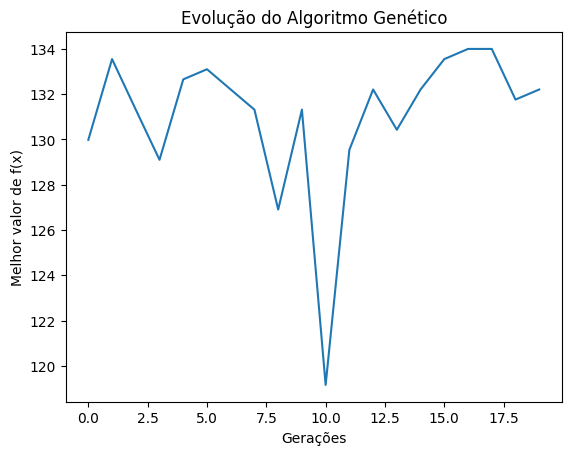

melhor x: -9.921798631476051, valor da função f(x): 132.2074839779882


In [ ]:
import random
import matplotlib.pyplot as plt

# parâmetros do algoritmo
tamanho_pop = 30
geracoes = 20
taxa_crossover = 0.7
taxa_mutacao = 0.1

# definindo a função de avaliação
def funcao_avaliacao(x):
    return x**2 - 3*x + 4

# codificação de um valor x em um vetor binário
def codificar(x, bits=10):
    # normaliza o valor de x para o intervalo [0, 2^bits - 1]
    x_norm = int((x + 10) / 20 * (2**bits - 1))
    # retorna a representação binária de x_norm com 'bits' dígitos
    return format(x_norm, f'0{bits}b')

# decodificação de um vetor binário em um valor x
def decodificar(binario, bits=10):
    # converte o binário de volta para um inteiro
    x_norm = int(binario, 2)
    # normaliza o valor de volta para o intervalo [-10, 10]
    return x_norm / (2**bits - 1) * 20 - 10

# inicialização da população
def inicializar_populacao(tamanho_pop, bits=10):
    # cria uma população inicial de 'tamanho_pop' indivíduos
    return [codificar(random.uniform(-10, 10), bits) for _ in range(tamanho_pop)]

# seleção por torneio
def selecao_torneio(populacao, funcao_avaliacao):
    # seleciona aleatoriamente três indivíduos da população
    torneio = random.sample(populacao, 3)
    # ordena os indivíduos do torneio pela aptidão (função de avaliação)
    torneio.sort(key=lambda ind: funcao_avaliacao(decodificar(ind)), reverse=True)
    # retorna os dois melhores indivíduos do torneio
    return torneio[0], torneio[1]

# crossover de um ponto
def crossover(pai1, pai2, taxa_crossover):
    # verifica se o crossover ocorrerá com base na taxa de crossover
    if random.random() < taxa_crossover:
        # seleciona um ponto de corte aleatório
        ponto_corte = random.randint(1, len(pai1) - 1)
        # cria dois filhos combinando partes dos pais
        return pai1[:ponto_corte] + pai2[ponto_corte:], pai2[:ponto_corte] + pai1[ponto_corte:]
    # se o crossover não ocorrer, retorna os pais inalterados
    return pai1, pai2

# mutação
def mutacao(individuo, taxa_mutacao):
    # percorre cada bit do indivíduo e aplica mutação com base na taxa de mutação
    individuo_mutado = ''.join(
        bit if random.random() > taxa_mutacao else str(1 - int(bit))
        for bit in individuo
    )
    # retorna o indivíduo possivelmente mutado
    return individuo_mutado

# algoritmo genético
def algoritmo_genetico(tamanho_pop=4, geracoes=5, taxa_crossover=0.7, taxa_mutacao=0.01, bits=10):
    # inicializa a população
    populacao = inicializar_populacao(tamanho_pop, bits)
    # lista para armazenar o valor máximo de cada geração
    historico_melhores = []

    # itera através do número de gerações especificadas
    for geracao in range(geracoes):
        nova_populacao = []
        # gera uma nova população
        while len(nova_populacao) < tamanho_pop:
            # seleciona dois pais através do torneio
            pai1, pai2 = selecao_torneio(populacao, funcao_avaliacao)
            # realiza o crossover para criar dois filhos
            filho1, filho2 = crossover(pai1, pai2, taxa_crossover)
            # aplica mutação nos filhos
            filho1 = mutacao(filho1, taxa_mutacao)
            filho2 = mutacao(filho2, taxa_mutacao)
            # adiciona os filhos à nova população
            nova_populacao.extend([filho1, filho2])
        # atualiza a população para a nova geração
        populacao = nova_populacao[:tamanho_pop]
        # encontra o melhor indivíduo da população atual
        melhor_individuo = max(populacao, key=lambda ind: funcao_avaliacao(decodificar(ind)))
        melhor_x = decodificar(melhor_individuo)
        melhor_y = funcao_avaliacao(melhor_x)
        # armazena o melhor valor encontrado nesta geração
        historico_melhores.append(melhor_y)

    # plota a evolução dos valores de f(x)
    plt.plot(historico_melhores)
    plt.title('Evolução do Algoritmo Genético')
    plt.xlabel('Gerações')
    plt.ylabel('Melhor valor de f(x)')
    plt.show()

    return melhor_x, melhor_y

# executando o algoritmo genético
melhor_x, melhor_y = algoritmo_genetico(tamanho_pop, geracoes, taxa_crossover, taxa_mutacao)
print(f'melhor x: {melhor_x}, valor da função f(x): {melhor_y}')


# Expectativa dos Resultados de Acordo com a Mudança dos Parâmetros

## 1. Tamanho da População

- **Pequena População (e.g., 4 a 10 indivíduos):**
  - **Expectativa:** Menor diversidade genética, maior risco de convergência prematura (ficar preso em um ótimo local).
  - **Efeito:** O algoritmo pode encontrar uma solução aceitável mais rapidamente, mas pode não explorar o espaço de busca de maneira eficaz.

- **Grande População (e.g., 20 a 30 indivíduos ou mais):**
  - **Expectativa:** Maior diversidade genética e maior capacidade de explorar o espaço de busca.
  - **Efeito:** Pode levar mais tempo para convergir, mas tem uma melhor chance de encontrar a solução global ótima.

## 2. Número de Gerações

- **Menos Gerações (e.g., 5 a 10):**
  - **Expectativa:** O algoritmo pode não ter tempo suficiente para convergir para uma solução ótima.
  - **Efeito:** Resultados podem ser subótimos, com menos chance de encontrar a melhor solução possível.

- **Mais Gerações (e.g., 15 a 20 ou mais):**
  - **Expectativa:** O algoritmo tem mais tempo para explorar e refinar soluções.
  - **Efeito:** Maior chance de encontrar a solução ótima ou próxima do ótimo, mas pode levar mais tempo para computar.

## 3. Taxa de Crossover

- **Taxa Baixa (e.g., 30%):**
  - **Expectativa:** Menos troca de informações entre indivíduos, menor capacidade de exploração.
  - **Efeito:** O algoritmo pode explorar menos e focar mais na exploração local, possivelmente levando a uma convergência mais lenta.

- **Taxa Alta (e.g., 70% ou mais):**
  - **Expectativa:** Maior troca de informações entre indivíduos, maior capacidade de explorar o espaço de busca.
  - **Efeito:** O algoritmo pode convergir mais rapidamente, mas pode também perder boas soluções se o crossover não for bem controlado.

## 4. Taxa de Mutação

- **Taxa Baixa (e.g., 0.1% a 1%):**
  - **Expectativa:** Menos variação genética, maior chance de convergência rápida, mas com risco de ficar preso em ótimos locais.
  - **Efeito:** Menor capacidade de explorar novos pontos no espaço de busca, o que pode levar a uma solução subótima.

- **Taxa Alta (e.g., 5% ou mais):**
  - **Expectativa:** Maior variação genética, melhor capacidade de explorar novos pontos no espaço de busca.
  - **Efeito:** Pode introduzir muita aleatoriedade, levando a uma maior chance de encontrar boas soluções, mas também pode resultar em uma maior instabilidade e convergência mais lenta.

## 5. Método de Seleção (Torneio)

- **Torneio Pequeno (e.g., k=2):**
  - **Expectativa:** Menor pressão seletiva, maior chance de manter a diversidade genética.
  - **Efeito:** Pode levar a uma exploração mais ampla, mas menos foco em soluções de alta qualidade.

- **Torneio Grande (e.g., k=4 ou mais):**
  - **Expectativa:** Maior pressão seletiva, com maior probabilidade de escolher indivíduos com alta qualidade.
  - **Efeito:** Pode acelerar a convergência, mas com o risco de perder diversidade genética e ficar preso em ótimos locais.

## 6. Representação Binária e Intervalo

- **Representação com Menos Bits:**
  - **Expectativa:** Menor resolução na representação do espaço de busca.
  - **Efeito:** Pode não capturar a complexidade da função, resultando em menos precisão.

- **Representação com Mais Bits:**
  - **Expectativa:** Maior resolução e capacidade de representar pontos mais próximos no espaço de busca.
  - **Efeito:** Maior capacidade de explorar a função de forma mais precisa, mas pode aumentar o tempo computacional.
